# Homework 1
## Egemen Pamukcu

Importing the necessary libraries and requesting the specific file (using the File ID) that matches the following filters: 
![alt text](filters.png "Title")

In [86]:
from matplotlib import pyplot as plt
import requests
import json
import re
import gzip
import shutil
import pandas as pd
import numpy as np

file_id = "8e1abbf3-ba2e-4bb9-8d63-08aea0ddce1b"
data_endpt = "https://api.gdc.cancer.gov/data/{}".format(file_id)

response = requests.get(data_endpt, headers = {"Content-Type": "application/json"})

# The file name can be found in the header within the Content-Disposition key.
response_head_cd = response.headers["Content-Disposition"]

file_name = re.findall("filename=(.+)", response_head_cd)[0]

with open(file_name, "wb") as output_file:
    output_file.write(response.content)
    
with gzip.open('5f977cf2-9f80-4df2-a5de-4c964adcd404.htseq.counts.gz', 'rb') as f_in:
    with open('file.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

Loading the tsv file: 

In [94]:
df = pd.read_csv('file.txt', sep='\t', names=['gene', 'count'])[:-5]
df.sort_values(by='count', ascending=False, inplace=True)

#### 20 most common genes:

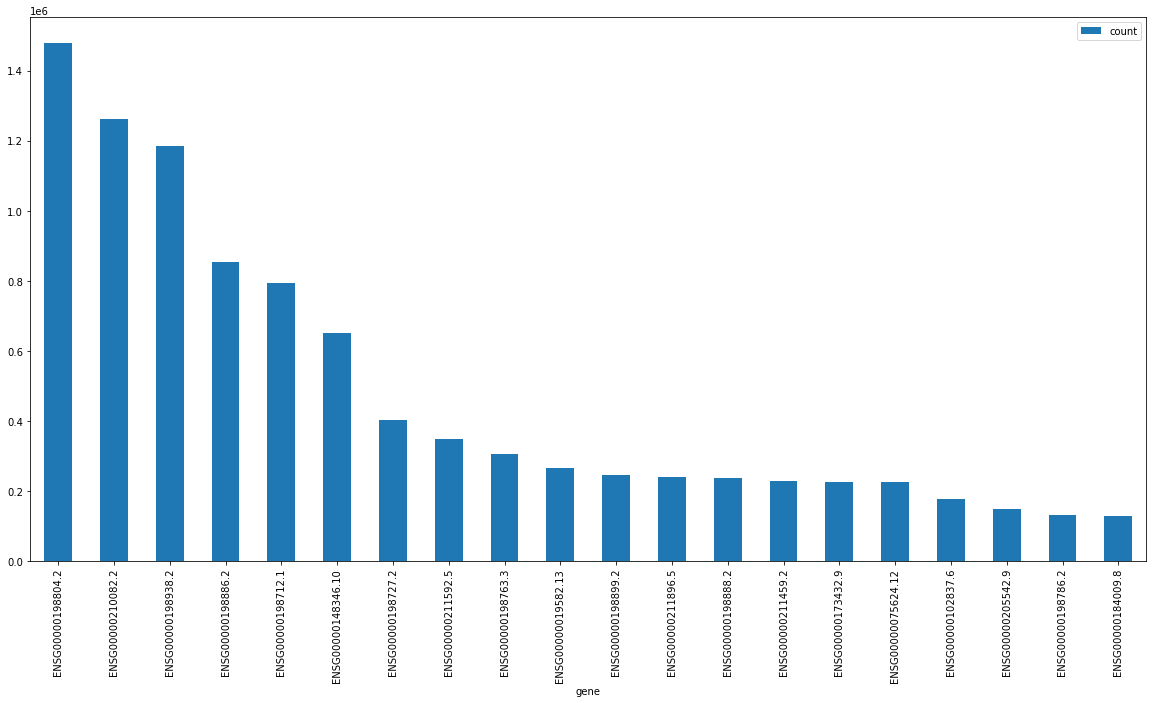

In [95]:
df.set_index('gene')[:20].plot(kind='bar',figsize=(20, 10));

#### 100 most common genes

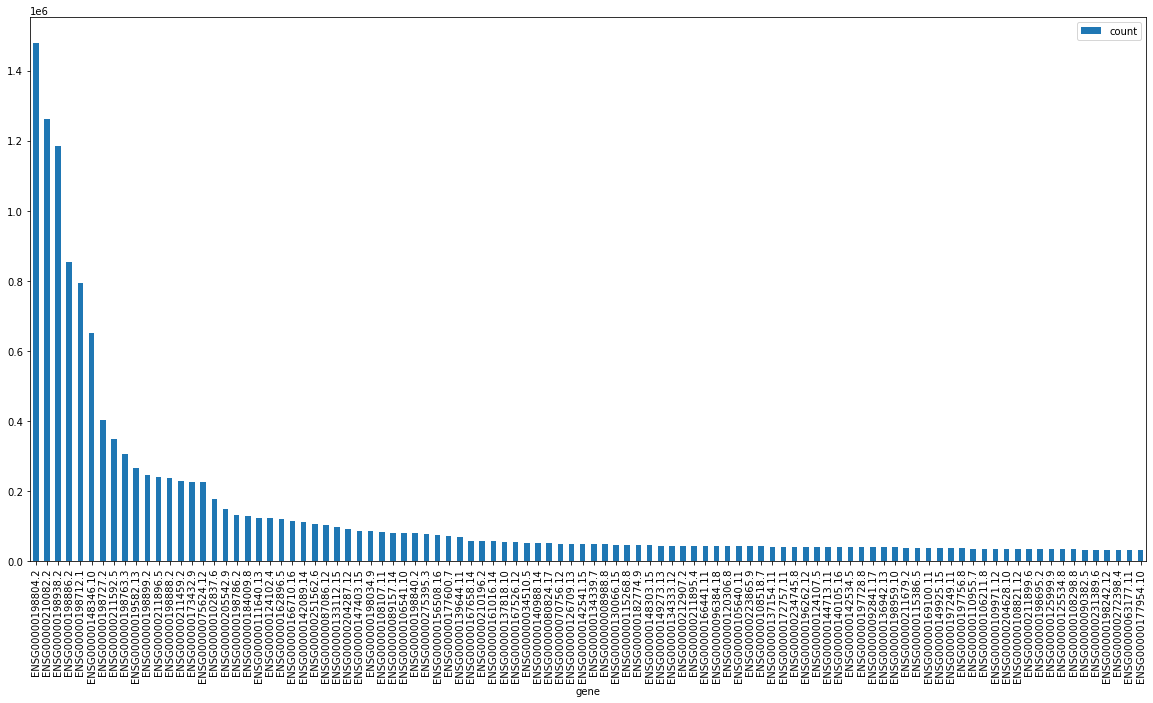

In [93]:
df.set_index('gene')[:100].plot(kind='bar',figsize=(20, 10));

#### Histogram showing frequency of gene counts

Setting up logarithmic bins for histogram: 

In [144]:
l = list(np.logspace(0, 7, 8))
l.insert(0, 0)
l = [int(i) for i in l]
print(l)

[0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]


In [145]:
bins = pd.cut(df['count'], bins=l, include_lowest=True, right=False)
df['bins'] = bins

In [146]:
count_bins = df[['gene', 'bins']].groupby(by='bins').count()

In [148]:
count_bins

,gene
bins,
"[0, 1)",25567
"[1, 10)",14806
"[10, 100)",7597
"[100, 1000)",7695
"[1000, 10000)",4470
"[10000, 100000)",321
"[100000, 1000000)",24
"[1000000, 10000000)",3


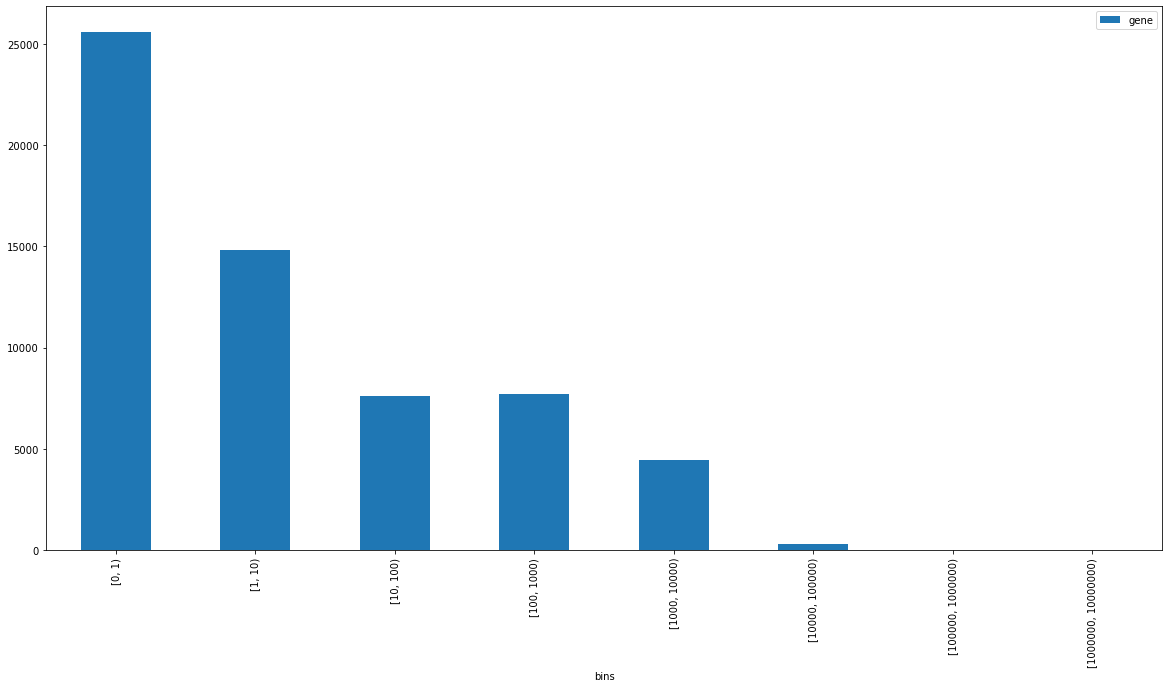

In [147]:
count_bins.plot(kind='bar', figsize=(20, 10));